In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [79]:
df = pd.read_csv("data/train.csv")
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [80]:
dfPriceAndAntiquity = df.loc[:,['precio','tipodepropiedad','antiguedad']]

In [81]:
dfPriceAndAntiquity = dfPriceAndAntiquity.dropna()

In [82]:
dfPriceAndAntiquity.tipodepropiedad.value_counts(normalize = True).iloc[:6].sum()

0.9721943645480694

In [84]:
important = dfPriceAndAntiquity.tipodepropiedad.value_counts().iloc[:6].index.tolist()
#Representan un 97% de las ventas

In [85]:
dfPriceAndAntiquity = dfPriceAndAntiquity.loc[dfPriceAndAntiquity.tipodepropiedad.isin(important)]
dfPriceAndAntiquity.tipodepropiedad.value_counts()

Casa                  119026
Apartamento            48290
Casa en condominio     16286
Terreno                 3721
Local Comercial         2240
Oficina comercial       1410
Name: tipodepropiedad, dtype: int64

In [86]:
groups = dfPriceAndAntiquity.groupby('tipodepropiedad')

#### A modo de simplificación, se toma los 5 tipos de propiedades más representantivas a modo de simplificar el ruido que generan las demás propiedades a la hora de hacer cierto análisis.

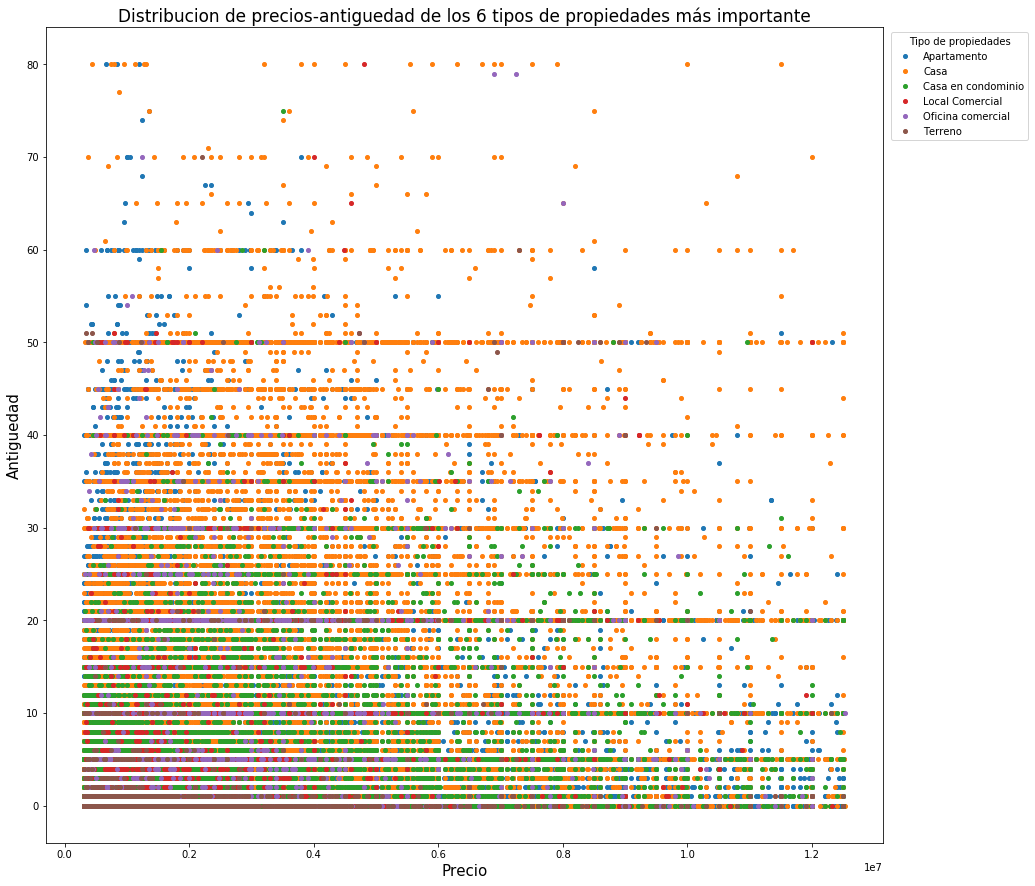

In [87]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.precio, group.antiguedad, marker='o', linestyle='', ms=4, label=name)
ax.legend(title = "Tipo de propiedades",loc = 'upper right',bbox_to_anchor=(1.18, 1.0))
fig.set_figheight(15)
fig.set_figwidth(15)
plt.title('Distribucion de precios-antiguedad de los 6 tipos de propiedades más importante', color='black', fontsize = 17)
plt.xlabel("Precio",size = 15)
plt.ylabel("Antiguedad", size = 15)



plt.show()

#### Se puede ver como la distribución de las casas es más variado y tiene mucha varianza en cuanto a la antiguedad, contrario a lo que sucede con las demás categorias.
#### Otra observación que se puede observar es el redondeo en la antiguedad, que se hace en multiplos de 5 en todas las propiedades.

In [88]:
dfPriceAndAntiquity.groupby(dfPriceAndAntiquity.tipodepropiedad)

/home/braianvillalba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


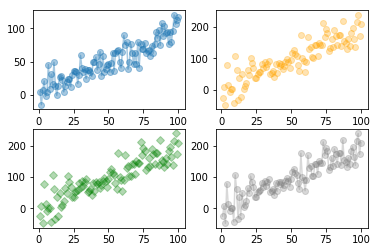

In [10]:
from matplotlib import pyplot as plt
#import pandas as pd
#import numpy as np
#df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
 
# Cut the window with 2 rows and 2 columns:
plt.subplot(221)
plt.plot( 'x', 'y', data=df, marker='o', alpha=0.4)
plt.subplot(222)
plt.plot( 'x','z', data=df, linestyle='none', marker='o', color="orange", alpha=0.3)
plt.subplot(223)
plt.plot( 'x','z', data=df, linestyle='none', marker='D', color="green", alpha=0.3)
plt.subplot(224)
plt.plot( 'x','z', data=df, marker='o', color="grey", alpha=0.3)
plt.show()


In [30]:
df.head()

,x,y,z
0,1,5.273555,-25.158961
1,2,-14.296931,7.634998
2,3,7.944917,-48.094636
3,4,21.212656,78.430606
4,5,-1.765854,14.688674


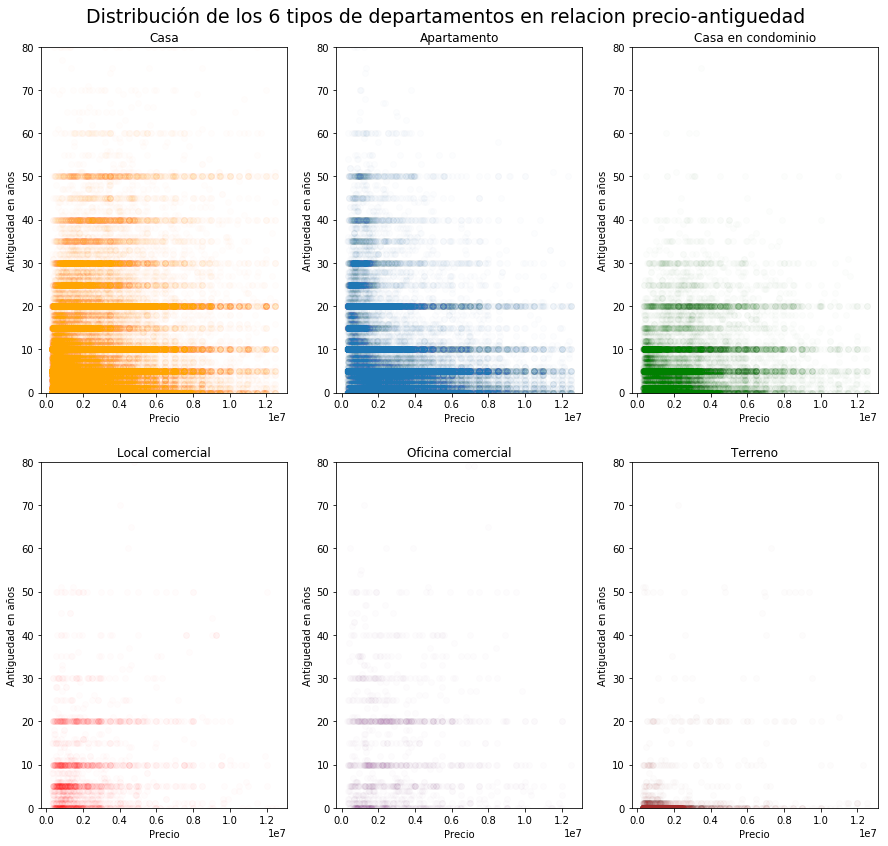

In [121]:
#df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
import matplotlib.pyplot as plt
import numpy as np

dfCasa = dfPriceAndAntiquity.loc[dfPriceAndAntiquity.tipodepropiedad == 'Casa']
dfApar = dfPriceAndAntiquity.loc[dfPriceAndAntiquity.tipodepropiedad == 'Apartamento']
dfCc = dfPriceAndAntiquity.loc[dfPriceAndAntiquity.tipodepropiedad == 'Casa en condominio']
dfT = dfPriceAndAntiquity.loc[dfPriceAndAntiquity.tipodepropiedad == 'Terreno']
dfLC = dfPriceAndAntiquity.loc[dfPriceAndAntiquity.tipodepropiedad == 'Local Comercial']
dfOC = dfPriceAndAntiquity.loc[dfPriceAndAntiquity.tipodepropiedad == 'Oficina comercial']

f = plt.figure(figsize=(15,14) )

ax = f.add_subplot(231)
ax.plot( 'precio', 'antiguedad', linestyle='none',data=dfCasa, marker='o',color = 'orange', alpha=0.01)
ax.set_ylim(0, 80)
ax.set_title("Casa")
ax.set_xlabel('Precio')
ax.set_ylabel('Antiguedad en años')
ax = f.add_subplot(232)
ax.plot( 'precio', 'antiguedad', linestyle='none',data=dfApar, marker='o', alpha=0.01)
ax.set_ylim(0, 80)
ax.set_title("Apartamento")
ax.set_xlabel('Precio')
ax.set_ylabel('Antiguedad en años')
ax = f.add_subplot(233)
ax.plot( 'precio', 'antiguedad', linestyle='none',data=dfCc, marker='o',color='green', alpha=0.01)
ax.set_ylim(0, 80)
ax.set_title("Casa en condominio")
ax.set_xlabel('Precio')
ax.set_ylabel('Antiguedad en años')
ax = f.add_subplot(234)
ax.plot( 'precio', 'antiguedad', linestyle='none',data=dfLC, marker='o',color='red', alpha=0.01)
ax.set_ylim(0, 80)
ax.set_title("Local comercial")
ax.set_xlabel('Precio')
ax.set_ylabel('Antiguedad en años')
ax = f.add_subplot(236)
ax.plot( 'precio', 'antiguedad', linestyle='none',data=dfT, marker='o',color='brown', alpha=0.01)
ax.set_ylim(0, 80)
ax.set_title("Terreno")
ax.set_xlabel('Precio')
ax.set_ylabel('Antiguedad en años')
ax = f.add_subplot(235)
ax.set_ylim(0, 80)
ax.set_title("Oficina comercial")
ax.set_xlabel('Precio')
ax.set_ylabel('Antiguedad en años')
ax.plot( 'precio', 'antiguedad', linestyle='none',data=dfOC, marker='o',color='purple', alpha=0.01)
plt.suptitle('Distribución de los 6 tipos de departamentos en relacion precio-antiguedad',fontsize = 19, y=0.92)

plt.show()

#### Este gráfico muestra de manera desacoplada la distribución de la antiguedad-precio entre las 6 tipos de propiedades
Como claramente se nota, tanto Casa y